# Speech Act Classification using Support Vector Machines 
Where the output is a single label

Generating the sentences and labels from the Excel sheet

In [61]:
import pandas as pd

In [62]:
raw_data = pd.read_csv("../data/adjusted-labels-prioritised-importance.csv")

filtered_data = raw_data[raw_data["Label"] != "Other"]

In [63]:
sentences = filtered_data["Sentence"]
labels = filtered_data["Label"]

## Visualising the Data

In [64]:
filtered_data.head()

,Sentence,Label
0,at all how are you saying that we do not know ...,Action words
1,alpha confirm where you want foxtrot 6 over,Communications
2,charlie nothing is yet just to make sure it do...,Communications
3,roger out you want to send one unit north to h...,Woods
4,this is charlie it looks like the fire spread ...,Reasoning words


Distribution of the data

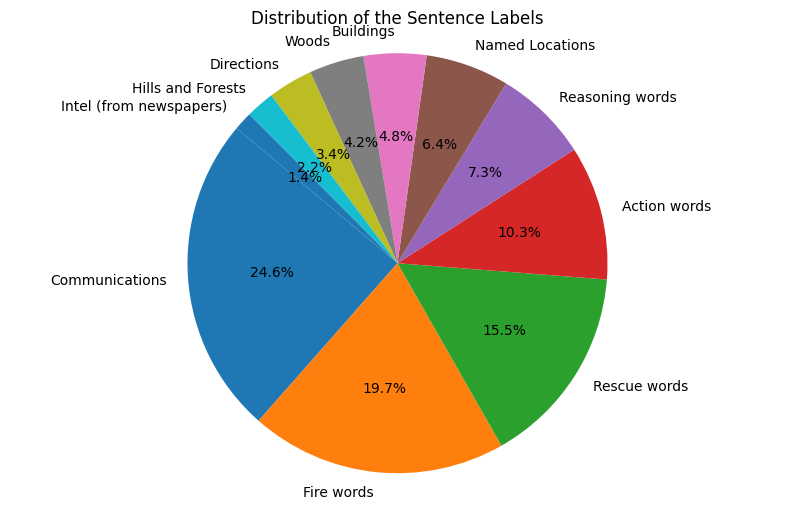

In [65]:
from matplotlib import pyplot as plt

label_counts = labels.value_counts()

plt.figure(figsize=(10, 6))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of the Sentence Labels")
plt.axis("equal")
plt.show()

## Preprocessing

Separating the data into training and test data

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2)

Vectorising based on the Tf-idf values in the data set

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,
                             max_df=0.8,
                             sublinear_tf=True,
                             use_idf=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

Selecting the Linear Support Vector Classification model

In [68]:
from sklearn import svm

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_rbf = svm.SVC(kernel="rbf")
classifier_polynomial = svm.SVC(kernel="poly")
classifier_sigmoid = svm.SVC(kernel="sigmoid")

In [69]:
classifier_linear.fit(train_vectors, y_train)
classifier_rbf.fit(train_vectors, y_train)
classifier_polynomial.fit(train_vectors, y_train)
classifier_sigmoid.fit(train_vectors, y_train)

SVC(kernel='sigmoid')

Evaluating Results

In [70]:
prediction_linear = classifier_linear.predict(test_vectors)
prediction_rbf = classifier_rbf.predict(test_vectors)
prediction_polynomial = classifier_polynomial.predict(test_vectors)
prediction_sigmoid = classifier_sigmoid.predict(test_vectors)

In [71]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(y_test, prediction_linear, zero_division=0)
print("Classification Report: Adjusted Label Importance - Linear Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_linear):.2f}")
print(report)

Classification Report: Adjusted Label Importance - Linear Kernel
Accuracy: 0.81
                         precision    recall  f1-score   support

           Action words       0.81      0.63      0.71        46
              Buildings       0.80      0.80      0.80        20
         Communications       0.74      0.98      0.84       105
             Directions       0.81      0.62      0.70        21
             Fire words       0.85      0.91      0.88        80
      Hills and Forests       0.60      0.38      0.46         8
Intel (from newspapers)       0.50      0.11      0.18         9
        Named Locations       0.70      0.59      0.64        32
        Reasoning words       0.80      0.69      0.74        29
           Rescue words       1.00      0.94      0.97        71
                  Woods       0.67      0.53      0.59        15

               accuracy                           0.81       436
              macro avg       0.75      0.65      0.68       436
        

In [72]:
report = classification_report(y_test, prediction_sigmoid, zero_division=0)
print("Classification Report: Adjusted Label Importance - Sigmoid Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_sigmoid):.2f}")
print(report)

Classification Report: Adjusted Label Importance - Sigmoid Kernel
Accuracy: 0.80
                         precision    recall  f1-score   support

           Action words       0.78      0.61      0.68        46
              Buildings       0.78      0.70      0.74        20
         Communications       0.73      0.98      0.84       105
             Directions       0.81      0.62      0.70        21
             Fire words       0.82      0.91      0.86        80
      Hills and Forests       0.60      0.38      0.46         8
Intel (from newspapers)       0.50      0.11      0.18         9
        Named Locations       0.70      0.59      0.64        32
        Reasoning words       0.80      0.69      0.74        29
           Rescue words       1.00      0.92      0.96        71
                  Woods       0.67      0.53      0.59        15

               accuracy                           0.80       436
              macro avg       0.74      0.64      0.67       436
       

In [73]:
report = classification_report(y_test, prediction_rbf, zero_division=0)
print("Classification Report: Adjusted Label Importance - RBF Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_rbf):.2f}")
print(report)

Classification Report: Adjusted Label Importance - RBF Kernel
Accuracy: 0.72
                         precision    recall  f1-score   support

           Action words       0.82      0.61      0.70        46
              Buildings       0.73      0.55      0.63        20
         Communications       0.59      0.99      0.74       105
             Directions       1.00      0.19      0.32        21
             Fire words       0.73      0.89      0.80        80
      Hills and Forests       1.00      0.12      0.22         8
Intel (from newspapers)       0.00      0.00      0.00         9
        Named Locations       0.67      0.25      0.36        32
        Reasoning words       0.79      0.66      0.72        29
           Rescue words       0.94      0.93      0.94        71
                  Woods       0.75      0.20      0.32        15

               accuracy                           0.72       436
              macro avg       0.73      0.49      0.52       436
           

In [74]:
report = classification_report(y_test, prediction_polynomial, zero_division=0)
print("Classification Report: Adjusted Label Importance - Polynomial Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_polynomial):.2f}")
print(report)

Classification Report: Adjusted Label Importance - Polynomial Kernel
Accuracy: 0.49
                         precision    recall  f1-score   support

           Action words       1.00      0.02      0.04        46
              Buildings       1.00      0.15      0.26        20
         Communications       0.40      0.95      0.56       105
             Directions       0.00      0.00      0.00        21
             Fire words       0.48      0.72      0.57        80
      Hills and Forests       0.00      0.00      0.00         8
Intel (from newspapers)       0.00      0.00      0.00         9
        Named Locations       0.00      0.00      0.00        32
        Reasoning words       0.00      0.00      0.00        29
           Rescue words       0.84      0.72      0.77        71
                  Woods       0.00      0.00      0.00        15

               accuracy                           0.49       436
              macro avg       0.34      0.23      0.20       436
    

In [75]:
# highest_seed = 0
# highest_acc = 0
# report = None
# 
# for seed in range(100):
#     X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=seed)
#     
#     train_vectors = vectorizer.fit_transform(X_train)
#     test_vectors = vectorizer.transform(X_test)
#     classifier_linear = svm.SVC(kernel='linear')
#     classifier_linear.fit(train_vectors, y_train)
#     prediction_linear = classifier_linear.predict(test_vectors)
#     local_report = classification_report(y_test, prediction_linear, zero_division=0)
#     accuracy = accuracy_score(y_test, prediction_linear)
#     print("Seed: ", seed)
#     print(accuracy)
#     
#     if accuracy > highest_acc:
#         highest_acc = accuracy
#         highest_seed = seed
#         report = local_report
#         
# print(highest_seed)
# print(highest_acc)
# print(report)

Seed:  0
0.8325688073394495
Seed:  1
0.8577981651376146
Seed:  2
0.8302752293577982
Seed:  3
0.7935779816513762
Seed:  4
0.8463302752293578
Seed:  5
0.841743119266055
Seed:  6
0.7981651376146789
Seed:  7
0.8096330275229358
Seed:  8
0.8004587155963303
Seed:  9
0.8371559633027523
Seed:  10
0.841743119266055
Seed:  11
0.8600917431192661
Seed:  12
0.8211009174311926
Seed:  13
0.8302752293577982
Seed:  14
0.8440366972477065
Seed:  15
0.8165137614678899
Seed:  16
0.8119266055045872
Seed:  17
0.8486238532110092
Seed:  18
0.823394495412844
Seed:  19
0.786697247706422
Seed:  20
0.8165137614678899
Seed:  21
0.8302752293577982
Seed:  22
0.8325688073394495
Seed:  23
0.8325688073394495
Seed:  24
0.8486238532110092
Seed:  25
0.8256880733944955
Seed:  26
0.8509174311926605
Seed:  27
0.8509174311926605
Seed:  28
0.8211009174311926
Seed:  29
0.7958715596330275
Seed:  30
0.8256880733944955
Seed:  31
0.8188073394495413
Seed:  32
0.8188073394495413
Seed:  33
0.8302752293577982
Seed:  34
0.805045871559633
